In [3]:
# For metadata/feature processing
import numpy as np
import pandas as pd
from glob import glob
from tqdm.notebook import tqdm

# For neural network
import tensorflow as tf

# For Accuracy metric
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# For image
import cv2
import matplotlib.pyplot as plt

2025-07-24 18:19:49.750316: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753381190.035576      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753381190.125879      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
paths = glob('/kaggle/input/pd-hw-data/dataset/wave/training/*/*png')
print(f"Num Train: {len(paths)}")

test_paths = glob('/kaggle/input/pd-hw-data/dataset/wave/testing/*/*png')
print(f"Num Test: {len(test_paths)}")

Num Train: 72
Num Test: 30


In [5]:
print('Train:')
df = pd.DataFrame(paths, columns=['image_path'])
display(df.head(2))

print('Test:')
test = pd.DataFrame(test_paths, columns=['image_path'])
display(test.head(2))

Train:


image_path
0  /kaggle/input/pd-hw-data/dataset/wave/training...
1  /kaggle/input/pd-hw-data/dataset/wave/training...

Test:


image_path
0  /kaggle/input/pd-hw-data/dataset/wave/testing/...
1  /kaggle/input/pd-hw-data/dataset/wave/testing/...

In [6]:
# First we map the class name from the image paths, similar to how it is done in the above code
# Train
df['drawing type'] = df.image_path.map(lambda x: x.split('/')[-4]) # extract class
df['class_name'] = df.image_path.map(lambda x: x.split('/')[-2]) # extract class
df['split'] = df.image_path.map(lambda x: x.split('/')[-3]) # extract class
df['class_id'] = df.image_path.map(lambda x: x.split('/')[-1]) # extract class
display(df.head(3))

image_path drawing type class_name  \
0  /kaggle/input/pd-hw-data/dataset/wave/training...         wave    healthy   
1  /kaggle/input/pd-hw-data/dataset/wave/training...         wave    healthy   
2  /kaggle/input/pd-hw-data/dataset/wave/training...         wave    healthy   

      split     class_id  
0  training  V55HO03.png  
1  training  V10HO02.png  
2  training  V04HO03.png

In [7]:
# First we map the class name from the image paths, similar to how it is done in the above code
# Train
test['drawing type'] = test.image_path.map(lambda x: x.split('/')[-4]) # extract class
test['class_name'] = test.image_path.map(lambda x: x.split('/')[-2]) # extract class
test['split'] = test.image_path.map(lambda x: x.split('/')[-3]) # extract class
test['class_id'] = test.image_path.map(lambda x: x.split('/')[-1]) # extract class
display(test.head(3))

image_path drawing type class_name  \
0  /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave    healthy   
1  /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave    healthy   
2  /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave    healthy   

     split     class_id  
0  testing  V10HO01.png  
1  testing  V01HO01.png  
2  testing  V55HO08.png

In [8]:
name2label = {k: v for v, k in enumerate(sorted(df['class_name'].unique()))}
name2label

{'healthy': 0, 'parkinson': 1}

In [9]:
label2name = {v: k for k, v in name2label.items()}
label2name

{0: 'healthy', 1: 'parkinson'}

In [10]:
# transforming the labels
df['class_label'] = df['class_name'].map(name2label)
display(df.head(2))

image_path drawing type class_name  \
0  /kaggle/input/pd-hw-data/dataset/wave/training...         wave    healthy   
1  /kaggle/input/pd-hw-data/dataset/wave/training...         wave    healthy   

      split     class_id  class_label  
0  training  V55HO03.png            0  
1  training  V10HO02.png            0

In [11]:
test['class_label'] = test['class_name'].map(name2label)
display(df.head(2))

image_path drawing type class_name  \
0  /kaggle/input/pd-hw-data/dataset/wave/training...         wave    healthy   
1  /kaggle/input/pd-hw-data/dataset/wave/training...         wave    healthy   

      split     class_id  class_label  
0  training  V55HO03.png            0  
1  training  V10HO02.png            0

In [12]:
train_df=df

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42)
for val_idx, test_idx in sss.split(test, test['class_label']):
    valid_df = test.iloc[val_idx]
    test_df = test.iloc[test_idx]

print(f"Train: {len(train_df)}")
print(f"Test: {len(test_df)}")
print(f"Valid: {len(valid_df)}")

Train: 72
Test: 10
Valid: 20


In [14]:
display(valid_df.head(14))

image_path drawing type class_name  \
18  /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave  parkinson   
11  /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave    healthy   
8   /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave    healthy   
9   /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave    healthy   
25  /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave  parkinson   
1   /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave    healthy   
5   /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave    healthy   
15  /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave  parkinson   
14  /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave    healthy   
13  /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave    healthy   
2   /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave    healthy   
23  /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave  parkinson   
0   /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave    healthy   
24  /kaggle/input/pd-hw-data/dataset/wave/testing/...         wave  parkinson   

      split     class_id  class_label  
18  testing  V08PO01.png            1  
11  testing  V06HO01.png            0  
8   testing  V02HO01.png            0  
9   testing  V55HO10.png            0  
25  testing  V07PO01.png            1  
1   testing  V01HO01.png            0  
5   testing  V07HO01.png            0  
15  testing  V02PO01.png            1  
14  testing  V03HO01.png            0  
13  testing  V11HO01.png            0  
2   testing  V55HO08.png            0  
23  testing  V05PO01.png            1  
0   testing  V10HO01.png            0  
24  testing  V10PO01.png            1

In [15]:
# opencv (cv2) is used for loading image
def load_image(path):
    img = cv2.imread(path, -1) # `-1` means load image as it is, thus no gray to rgb conversion
    img = img[...,::-1] # bgr to rgb
    return img

## Image Shape: (242, 512, 3)
## Label: 0
## Name: healthy


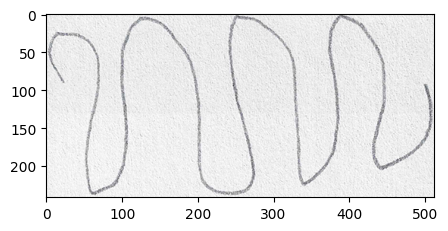

In [16]:
row = train_df.iloc[21]
img = load_image(row.image_path)
print(f"## Image Shape: {img.shape}")
print(f"## Label: {row.class_label}")
print(f'## Name: {row.class_name}')

plt.figure(figsize=(5,5))
plt.imshow(img);

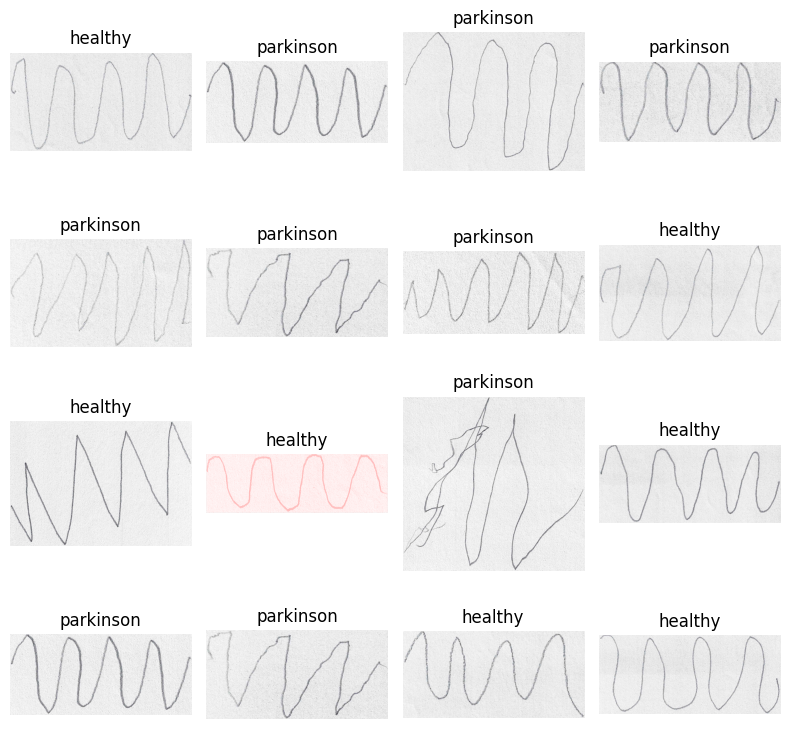

In [17]:
# Define the size of the grid
grid_size = 4

# Create a figure and axes for the grid of images
fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size*2, grid_size*2))

# Iterate over the images and labels
for i in range(grid_size**2):
    # Generate random index
    img_idx = np.random.randint(0, len(train_df))
    row = train_df.iloc[img_idx]
    
    # Load the image using your preferred method (not implemented here)
    img = load_image(row.image_path)

    # Determine the row and column indices in the grid
    x = i // grid_size
    y = i % grid_size

    # Display the image in the corresponding grid cell
    axes[x, y].imshow(img)
    axes[x, y].set_title(str(row.class_name))
    axes[x, y].axis('off')

# Adjust the spacing and layout of the subplots
plt.tight_layout()

# Show the grid of images
plt.show()

In [18]:
import numpy as np
import cv2
import tensorflow as tf
import albumentations as A

class DataLoader(tf.keras.utils.Sequence):
    def __init__(self, paths, labels=None, batch_size=14, num_classes=1,
                 dim=(256, 256), shuffle=True, augment=True, augment_fn=None, channels=1):
        self.paths = paths
        self.labels = labels
        self.batch_size = batch_size
        self.num_classes = num_classes
        self.dim = dim
        self.shuffle = shuffle
        self.augment = augment
        self.channels = channels

        # Updated: Gentle augmentations for wave data
        self.augment_fn = augment_fn or A.Compose([
            A.HorizontalFlip(p=0.5),
            A.Rotate(limit=10, p=0.5, border_mode=cv2.BORDER_REFLECT, interpolation=cv2.INTER_NEAREST),
        ])

        # Contrast Limited Adaptive Histogram Equalization
        self.clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.paths) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        return self.__data_generation(batch_indexes)

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, batch_indexes):
        actual_batch_size = len(batch_indexes)
        X = np.empty((actual_batch_size, *self.dim, self.channels), dtype=np.float32)

        if self.labels is not None:
            y = np.empty((actual_batch_size), dtype=np.float32)

        for i, idx in enumerate(batch_indexes):
            try:
                # Read in grayscale
                img = cv2.imread(self.paths[idx], cv2.IMREAD_GRAYSCALE)
                if img is None:
                    raise ValueError(f"Image could not be read: {self.paths[idx]}")

                # Resize to fixed size
                img = cv2.resize(img, self.dim)

                # Apply CLAHE
                img = self.clahe.apply(img)

                # Apply augmentations
                if self.augment_fn and self.augment:
                    img = self.augment_fn(image=img)["image"]

                # Invert and normalize
                img = 255 - img
                img = img.astype(np.float32) / 255.0

                # Optional: Normalize to zero-mean unit-variance (commented)
                # img = (img - np.mean(img)) / (np.std(img) + 1e-8)

                if self.channels == 1:
                    X[i, ..., 0] = img
                else:
                    X[i] = np.stack([img] * 3, axis=-1)

                if self.labels is not None:
                    y[i] = self.labels[idx]

            except Exception as e:
                print(f"[Warning] Skipping image {self.paths[idx]} due to error: {e}")
                X[i] = 0.0
                if self.labels is not None:
                    y[i] = 0.0

        return (X, y.reshape(-1, 1)) if self.labels is not None else X


In [19]:


paths = train_df.image_path.tolist()
labels = train_df.class_label.tolist()

train_loader = DataLoader(paths, labels, batch_size=16, augment=True)

imgs, tars = train_loader.__getitem__(0)
print("Images:\n", imgs.shape)

print("\nLabels:\n", tars.shape)

Images:
 (16, 256, 256, 1)

Labels:
 (16, 1)


/tmp/ipykernel_36/1661459314.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tar = int(tars[i]>0.5) # label is one hot encoded


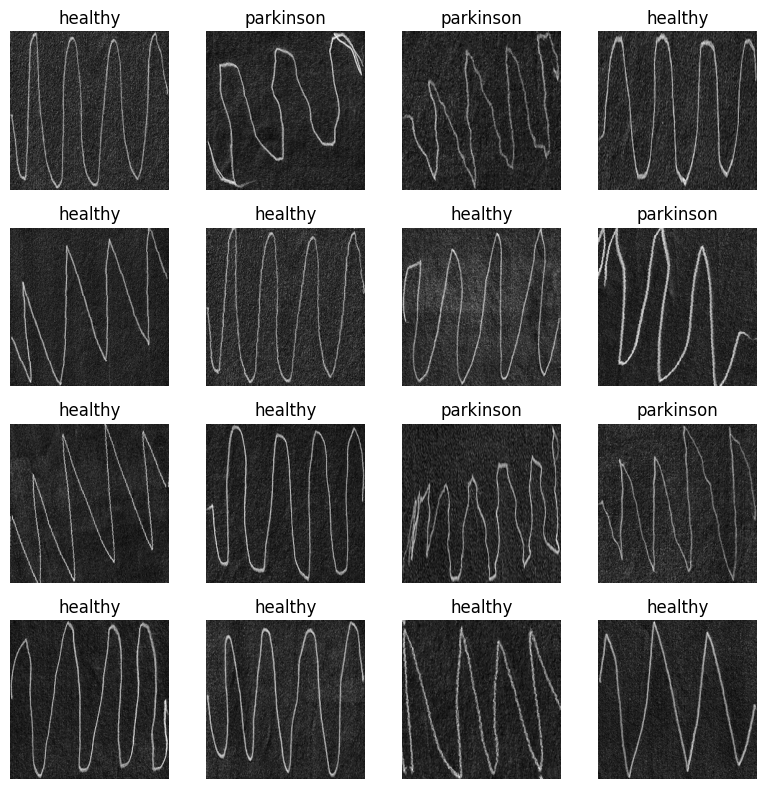

In [20]:
# Define the size of the grid
grid_size = 4

# Create a figure and axes for the grid of images
fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size*2, grid_size*2))

# Iterate over the images and labels
for i in range(16):
    
    # Load the image
    img = imgs[i] # images are feed as flatten to models
    
    # Get Label
    tar = int(tars[i]>0.5) # label is one hot encoded
    name = label2name[tar]

    # Determine the row and column indices in the grid
    x = i // grid_size
    y = i % grid_size

    # Display the image in the corresponding grid cell
    axes[x, y].imshow(img.squeeze(), cmap='gray')
    axes[x, y].set_title(name)
    axes[x, y].axis('off')

# Adjust the spacing and layout of the subplots
plt.tight_layout()

# Show the grid of images
plt.show()

In [21]:
print("Min:", imgs.min(), "Max:", imgs.max(), "Mean:", imgs.mean())


Min: 0.0 Max: 0.9529412 Mean: 0.15027839


In [22]:
import tensorflow.keras.backend as K
K.clear_session()


In [23]:
import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(gamma=2., alpha=0.25):
    def loss(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        pt = tf.where(K.equal(y_true, 1), y_pred, 1 - y_pred)
        return -K.mean(alpha * K.pow(1. - pt, gamma) * K.log(pt))
    return loss


In [24]:

# Step 1: Get train-test image paths and labels
train_paths = train_df['image_path'].tolist()
train_labels = train_df['class_label'].tolist()

valid_paths = valid_df['image_path'].tolist()
valid_labels = valid_df['class_label'].tolist()

# Step 2: Data loaders (with augmentation for training)
train_loader = DataLoader(train_paths, train_labels, batch_size=14, augment=True, dim=(256, 256))
valid_loader = DataLoader(valid_paths, valid_labels, batch_size=14, shuffle=False, dim=(256, 256))

print("Train Label Counts:", np.unique(train_labels, return_counts=True))
print("Validation Label Counts:", np.unique(valid_labels, return_counts=True))


Train Label Counts: (array([0, 1]), array([36, 36]))
Validation Label Counts: (array([0, 1]), array([10, 10]))


In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

def SpiralCNN(input_shape=(256, 256, 1)):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # binary classification
    ])
    return model


In [26]:
model = SpiralCNN()

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


2025-07-24 18:20:21.634083: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [27]:

# Compute Class Weights
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

ckpt_cb = ModelCheckpoint(
    filepath='/kaggle/working/best_ckpt.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max'
)

early_stop_cb = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [28]:

model.summary()

#tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,776,705 (33.48 MB)

 Trainable params: 8,776,705 (33.48 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
out = model(imgs)
out.shape

TensorShape([16, 1])

In [30]:

# Step 7: Train the Model
print('## Training')
history = model.fit(
    train_loader,
    validation_data=valid_loader,
    epochs=50,
    verbose=1,
    callbacks=[ckpt_cb, early_stop_cb],
    class_weight=class_weight_dict
)


## Training


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5575 - loss: 0.9207 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4878 - loss: 0.6957 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5321 - loss: 0.7005 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4990 - loss: 0.6944 - val_accuracy: 0.6000 - val_loss: 0.6926
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7454 - loss: 0.6903 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5350 - loss: 0.6903 - val_accuracy: 0.5500 - val_loss: 0.6918
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5200 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.6910
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5660 - loss: 0.6918 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 9/50
6/6 


## Inference
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step

## Accuracy: 0.8000

Classification Report:
              precision    recall  f1-score   support

     healthy       0.80      0.80      0.80        10
   parkinson       0.80      0.80      0.80        10

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



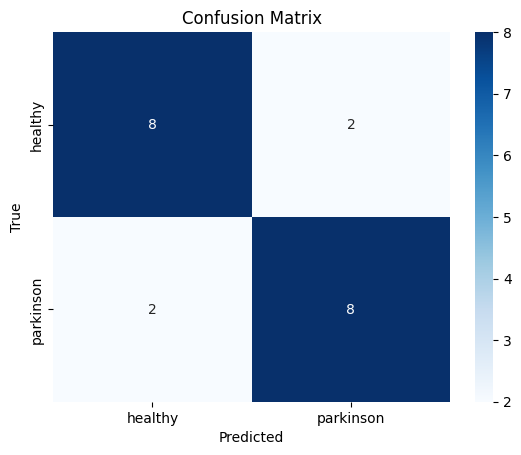

In [31]:

# Step 8: Load Best Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

tf.keras.backend.clear_session()
model = tf.keras.models.load_model('/kaggle/working/best_ckpt.h5', custom_objects={'loss_fn': focal_loss()})

# Step 9: Inference + Evaluation
print("\n## Inference")
valid_loader = DataLoader(valid_paths, valid_labels, batch_size=100, shuffle=False, dim=(256, 256))
predictions = model.predict(valid_loader)[:len(valid_labels)]

pred_labels = (predictions > 0.5).astype(int)
acc = accuracy_score(valid_labels, pred_labels)
print(f"\n## Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(valid_labels, pred_labels, target_names=['healthy', 'parkinson']))

cm = confusion_matrix(valid_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['healthy', 'parkinson'], yticklabels=['healthy', 'parkinson'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


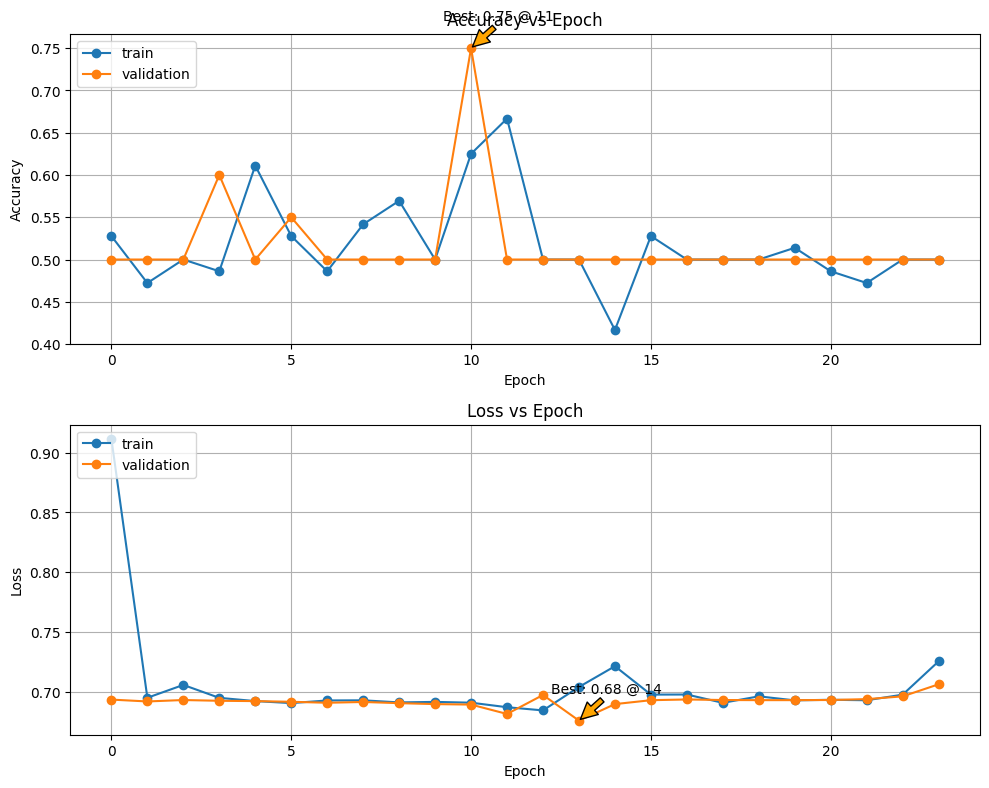

In [32]:

# Step 10: Training History Plot
def plot_history(history):
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], '-o')
    plt.plot(history.history['val_accuracy'], '-o')
    plt.title('Accuracy vs Epoch')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid(True)

    best_val_acc = max(history.history['val_accuracy'])
    best_epoch = np.argmax(history.history['val_accuracy'])
    plt.annotate(f'Best: {best_val_acc:.2f} @ {best_epoch+1}',
                 xy=(best_epoch, best_val_acc),
                 xytext=(-20, 20),
                 textcoords='offset points',
                 arrowprops=dict(facecolor='orange', shrink=0.05),
                 fontsize=10, color='black')

    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], '-o')
    plt.plot(history.history['val_loss'], '-o')
    plt.title('Loss vs Epoch')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid(True)

    best_val_loss = min(history.history['val_loss'])
    best_loss_epoch = np.argmin(history.history['val_loss'])
    plt.annotate(f'Best: {best_val_loss:.2f} @ {best_loss_epoch+1}',
                 xy=(best_loss_epoch, best_val_loss),
                 xytext=(-20, 20),
                 textcoords='offset points',
                 arrowprops=dict(facecolor='orange', shrink=0.05),
                 fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

plot_history(history)


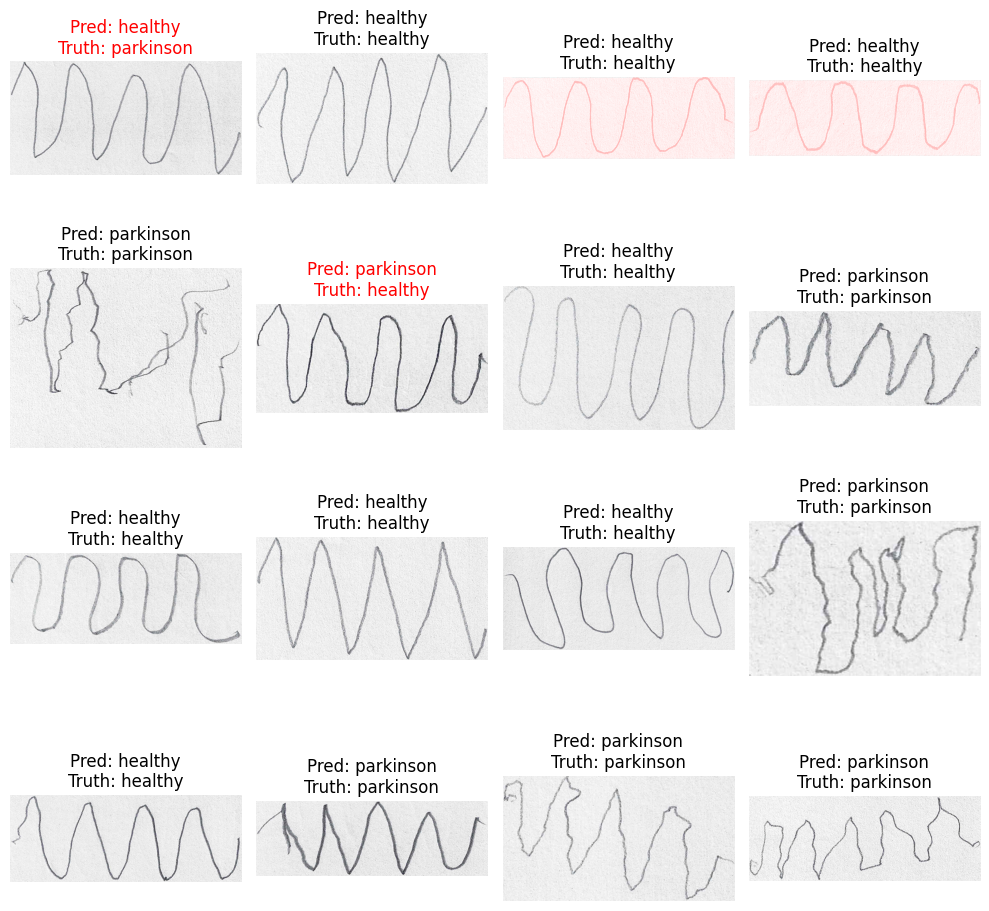

In [33]:
import numpy as np
import matplotlib.pyplot as plt

num_images = 16
sqrt_num_images = int(np.sqrt(num_images))
# indices = np.random.choice(len(valid_paths), num_images, replace=False)
fig, axes = plt.subplots(nrows=sqrt_num_images, ncols=sqrt_num_images, figsize=(10, 10))

for i, idx in enumerate(range(num_images)):
    row = i // sqrt_num_images
    col = i % sqrt_num_images

    image_path = valid_paths[idx]
    image = load_image(image_path)  # Load and preprocess single image
    
    # Get prediction and ground truth
    pred = (predictions[idx]>0.5).astype(int)[0]
    pred = label2name[pred] # 0 -> cat
    true = valid_labels[idx]
    true = label2name[true] # 0 -> cat

    axes[row, col].imshow(image)
    axes[row, col].axis('off')

    if pred == true:
        axes[row, col].set_title(f'Pred: {pred}\nTruth: {true}')
    else:
        axes[row, col].set_title(f'Pred: {pred}\nTruth: {true}', color='red')

plt.tight_layout()
plt.show()


In [34]:
test_paths = test_df['image_path'].tolist()
test_labels = test_df['class_label'].tolist()

# Convert string labels if needed
if isinstance(test_labels[0], str):
    label_map = {'healthy': 0, 'parkinson': 1}
    test_labels = [label_map[label] for label in test_labels]


In [35]:
test_loader = DataLoader(
    test_paths, test_labels,
    batch_size=32, shuffle=False, dim=(256, 256),
    augment=False
)


In [36]:
from tensorflow.keras.models import load_model

model = load_model('/kaggle/working/best_ckpt.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
Test Accuracy: 0.7000

Classification Report:
              precision    recall  f1-score   support

     healthy       0.75      0.60      0.67         5
   parkinson       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



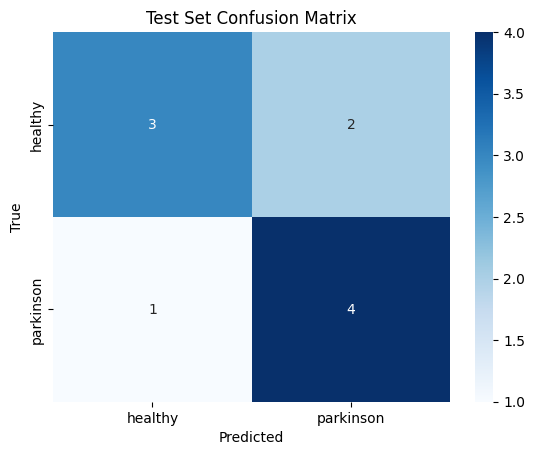

In [37]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(test_loader)[:len(test_labels)]
pred_labels = (predictions > 0.5).astype(int)

# Accuracy
acc = accuracy_score(test_labels, pred_labels)
print(f"Test Accuracy: {acc:.4f}")

# Report
print("\nClassification Report:")
print(classification_report(test_labels, pred_labels, target_names=['healthy', 'parkinson']))

# Confusion Matrix
cm = confusion_matrix(test_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['healthy', 'parkinson'],
            yticklabels=['healthy', 'parkinson'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Set Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


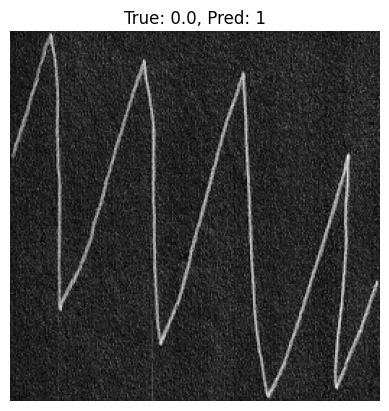

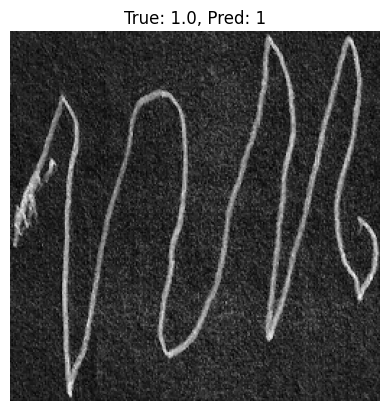

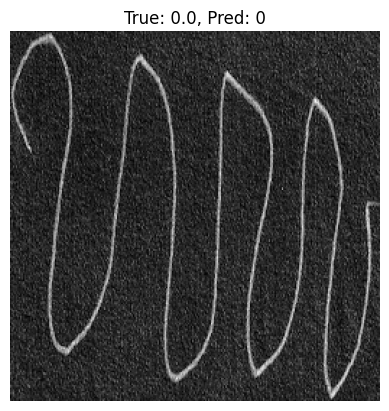

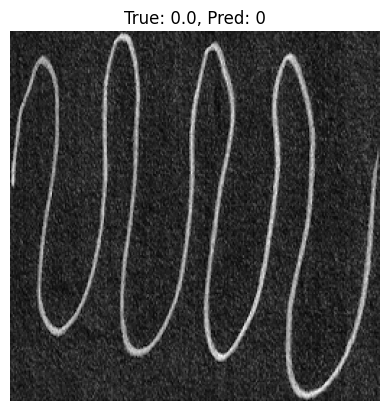

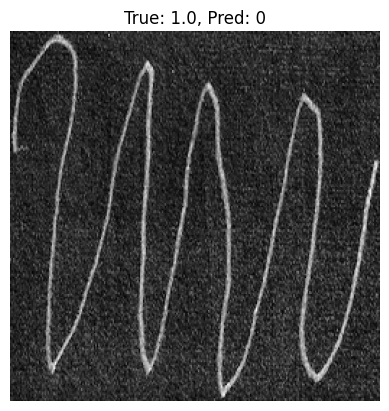

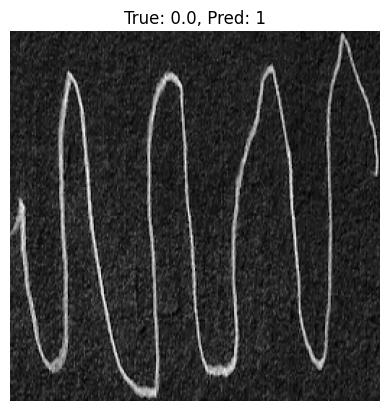

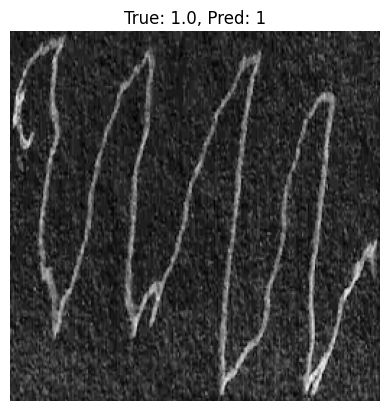

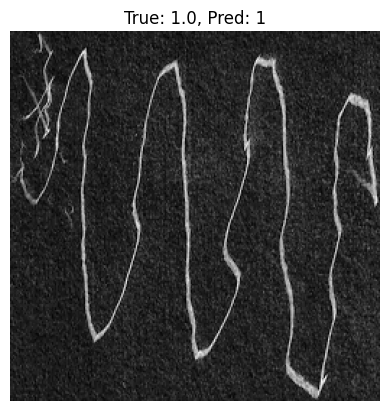

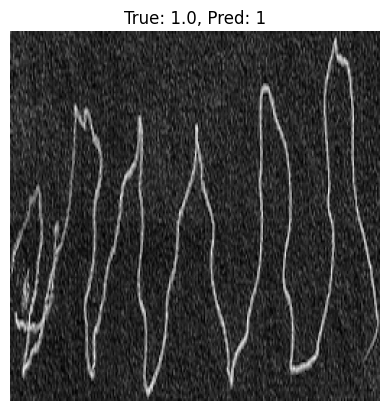

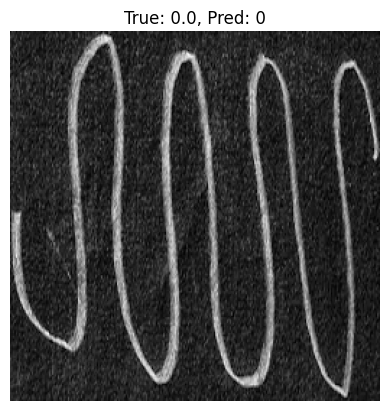

In [38]:
imgs, tars = test_loader.__getitem__(0)
preds = model.predict(imgs).ravel()
labels = (preds > 0.5).astype(int)

import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    plt.title(f"True: {tars[i][0]}, Pred: {labels[i]}")
    
    if pred == true:
        axes[row, col].set_title(f'Pred: {pred}\nTruth: {true}')
    else:
        axes[row, col].set_title(f'Pred: {pred}\nTruth: {true}', color='red')


    plt.axis('off')
    plt.show()
